# K-Nearest Neighbour Algorithm

#### Most companies only give classified data which has to be used to predict the class. In this we are going to use one such classified dataset and we are going predict the class using KNN algorithm

In [31]:
# Import all the data manipulation and visualization libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Read the dataset 
df = pd.read_csv('KNN_Project_Data')

In [3]:
# Use .head() to view the dataset
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Stadardize the dataset 
### As KNN algorithm use eucleadian distance to predict where it fall, any large value will have adverse affect on the result. Hence it is mandatory to standarize the dataset before training the model.
##### * excluding the Class which has to be predicted

In [4]:
# To standardize sklearn has an inbuilt module
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
# Fit and Transform the data 
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
new_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [15]:
newdf = pd.DataFrame(new_features, columns=df.columns[:-1])

### After Standarizing  

In [16]:
newdf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Lets split the dataset to train and test 

In [17]:
X = newdf 
y = df['TARGET CLASS']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Let build and train the model 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1) #here n_neighbours denotes the K value

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Prediction with our test data

In [23]:
prediction = knn.predict(X_test)

#### Evaluation using Classification and Confusion Matrix 

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

[[109  43]
 [ 41 107]]


In [26]:
# From the above evaluation metrics the model's accuracy is around 72% 
#varying the K value can give us some better accuracy

In [28]:
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

In [29]:
# Lets plot the graph and visualise the error_rate

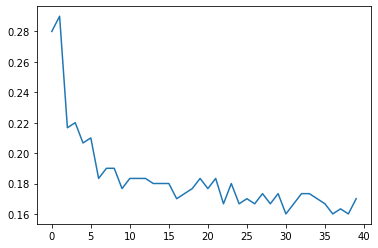

In [32]:
plt.plot(error_rate)

In [33]:
# From the graph the lowest point is 30 and 36 roughly lets try with this K value  

In [34]:
knn3 = KNeighborsClassifier(n_neighbors=36)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

In [36]:
prediction = knn.predict(X_test)

In [38]:
print("When K=36")
print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))

When K=36
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[125  27]
 [ 23 125]]
